In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import DatasetManager as dm

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import fpgrowth

from Eclat import Eclat

import time

Note: you may need to restart the kernel to use updated packages.


D:\Files\Anaconda\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\Files\Anaconda\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [3]:
def apriory(min_support, transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns= te.columns_)
    
    start = time.time()
    apriory_res = apriori(df, min_support= min_support, use_colnames=True)
    end = time.time() - start
    
    itemsetsCount = len(apriory_res.itemsets.unique())
    
    maxLen = 0
    for itemsets in apriory_res.itemsets:
        if len(itemsets) > maxLen:
            maxLen = len(itemsets)
    
    diffLenItemsets = set()
    for itemsets in apriory_res.itemsets:
        diffLenItemsets.add(len(itemsets))
    
    diffLenItemsetsCount = len(diffLenItemsets)
            
    return (apriory_res, end, itemsetsCount, maxLen, diffLenItemsetsCount)

In [59]:
def eclat(min_support, records):
    l = list();
    df = pd.DataFrame();
    for row in records.values:
        l.append([column for column in row if column!=0])
    df["Item"] = l
    model = Eclat(min_support = min_support)
    
    start = time.time()
    model.fit(df)
    end = time.time() - start
    
    eclat_res = model.transform()
    
    itemsetsCount = len(eclat_res)
    
    maxLen = 0
    for itemsets in eclat_res:
        if len(str(itemsets).split('|')) > maxLen:
            maxLen = len(str(itemsets).split('|'))
    
    diffLenItemsets = set()
    for itemsets in eclat_res:
        diffLenItemsets.add(len(str(itemsets).split('|')))
    
    diffLenItemsetsCount = len(diffLenItemsets)
    
    
    return (eclat_res, end, itemsetsCount, maxLen, diffLenItemsetsCount)

In [5]:
def fp_growth(min_support, transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns= te.columns_)
    
    start = time.time()
    fpgrowth_res = fpgrowth(df, min_support= min_support, use_colnames=True)
    end = time.time() - start
    
    itemsetsCount = len(fpgrowth_res.itemsets.unique())
    
    maxLen = 0
    for itemsets in fpgrowth_res.itemsets:
        if len(itemsets) > maxLen:
            maxLen = len(itemsets)
    
    diffLenItemsets = set()
    for itemsets in fpgrowth_res.itemsets:
        diffLenItemsets.add(len(itemsets))
    
    diffLenItemsetsCount = len(diffLenItemsets)
            
    return (fpgrowth_res, end, itemsetsCount, maxLen, diffLenItemsetsCount)

# 1 dataset

In [6]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records_1, products_1, transactions_1 = dm.LoadFirst()

In [7]:
min_supp_1 = [0.03, 0.003, 0.0003]

### Apriory

In [49]:
a_res1_1, a_time1_1, a_itemsetsCount1_1, a_maxLen1_1, a_diffLenItemsetsCount1_1 = apriory(min_supp_1[0], transactions_1)

In [55]:
a_res2_1, a_time2_1, a_itemsetsCount2_1, a_maxLen2_1, a_diffLenItemsetsCount2_1  = apriory(min_supp_1[1], transactions_1)

In [56]:
a_res3_1, a_time3_1, a_itemsetsCount3_1, a_maxLen3_1, a_diffLenItemsetsCount3_1  = apriory(min_supp_1[2], transactions_1)

### ECLAT

In [60]:
e_res1_1, e_time1_1, e_itemsetsCount1_1, e_maxLen1_1, e_diffLenItemsetsCount1_1 = eclat(min_supp_1[0], records_1)

In [61]:
e_res2_1, e_time2_1, e_itemsetsCount2_1, e_maxLen2_1, e_diffLenItemsetsCount2_1  = eclat(min_supp_1[1], records_1)

In [62]:
e_res3_1, e_time3_1, e_itemsetsCount3_1, e_maxLen3_1, e_diffLenItemsetsCount3_1  = eclat(min_supp_1[2], records_1)

### FP-Growth

In [15]:
f_res1_1, f_time1_1, f_itemsetsCount1_1, f_maxLen1_1, f_diffLenItemsetsCount1_1  = fp_growth(min_supp_1[0], transactions_1)

In [16]:
f_res2_1, f_time2_1, f_itemsetsCount2_1, f_maxLen2_1, f_diffLenItemsetsCount2_1 = fp_growth(min_supp_1[1], transactions_1)

In [17]:
f_res3_1, f_time3_1, f_itemsetsCount3_1, f_maxLen3_1, f_diffLenItemsetsCount3_1 = fp_growth(min_supp_1[2], transactions_1)

## 2 dataset

In [18]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records_2, products_2, transactions_2 = dm.LoadSecond()

In [19]:
min_supp_2 = [0.1, 0.01, 0.001]

### Apriory

In [46]:
a_res1_2, a_time1_2, a_itemsetsCount1_2, a_maxLen1_2, a_diffLenItemsetsCount1_2 = apriory(min_supp_2[0], transactions_2)

In [47]:
a_res2_2, a_time2_2, a_itemsetsCount2_2, a_maxLen2_2, a_diffLenItemsetsCount2_2 = apriory(min_supp_2[1], transactions_2)

In [48]:
a_res3_2, a_time3_2, a_itemsetsCount3_2, a_maxLen3_2, a_diffLenItemsetsCount3_2 = apriory(min_supp_2[2], transactions_2)

### ECLAT

In [63]:
e_res1_2, e_time1_2, e_itemsetsCount1_2, e_maxLen1_2, e_diffLenItemsetsCount1_2 = eclat(min_supp_2[0], records_2)

In [64]:
e_res2_2, e_time2_2, e_itemsetsCount2_2, e_maxLen2_2, e_diffLenItemsetsCount2_2 = eclat(min_supp_2[1], records_2)

In [65]:
e_res3_2, e_time3_2, e_itemsetsCount3_2, e_maxLen3_2, e_diffLenItemsetsCount3_2 = eclat(min_supp_2[2], records_2)

### FP-GROWTH

In [26]:
f_res1_2, f_time1_2, f_itemsetsCount1_2, f_maxLen1_2, f_diffLenItemsetsCount1_2 = fp_growth(min_supp_2[0], transactions_2)

In [27]:
f_res2_2, f_time2_2, f_itemsetsCount2_2, f_maxLen2_2, f_diffLenItemsetsCount2_2 = fp_growth(min_supp_2[1], transactions_2)

In [28]:
f_res3_2, f_time3_2, f_itemsetsCount3_2, f_maxLen3_2, f_diffLenItemsetsCount3_2 = fp_growth(min_supp_2[2], transactions_2)

## 3 dataset

In [29]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records_3, products_3, transactions_3 = dm.LoadThird()

In [30]:
min_supp_3 = [0.02, 0.002, 0.002]

### Apriory

In [78]:
a_res1_3, a_time1_3, a_itemsetsCount1_3, a_maxLen1_3, a_diffLenItemsetsCount1_3 = apriory(min_supp_3[0], transactions_3)

In [79]:
a_res2_3, a_time2_3, a_itemsetsCount2_3, a_maxLen2_3, a_diffLenItemsetsCount2_3 = apriory(min_supp_3[1], transactions_3)

In [80]:
a_res3_3, a_time3_3, a_itemsetsCount3_3, a_maxLen3_3, a_diffLenItemsetsCount3_3 = apriory(min_supp_3[2], transactions_3)

### ECLAT

In [66]:
e_res1_3, e_time1_3, e_itemsetsCount1_3, e_maxLen1_3, e_diffLenItemsetsCount1_3 = eclat(min_supp_3[0], records_3)

In [67]:
e_res2_3, e_time2_3, e_itemsetsCount2_3, e_maxLen2_3, e_diffLenItemsetsCount2_3 = eclat(min_supp_3[1], records_3)

In [68]:
e_res3_3, e_time3_3, e_itemsetsCount3_3, e_maxLen3_3, e_diffLenItemsetsCount3_3 = eclat(min_supp_3[2], records_3)

### FP-GROWTH

In [81]:
f_res1_3, f_time1_3, f_itemsetsCount1_3, f_maxLen1_3, f_diffLenItemsetsCount1_3 = fp_growth(min_supp_3[0], transactions_3)

In [82]:
f_res2_3, f_time2_3, f_itemsetsCount2_3, f_maxLen2_3, f_diffLenItemsetsCount2_3 = fp_growth(min_supp_3[1], transactions_3)

In [83]:
f_res3_3, f_time3_3, f_itemsetsCount3_3, f_maxLen3_3, f_diffLenItemsetsCount3_3 = fp_growth(min_supp_3[2], transactions_3)

## Диаграмы

In [40]:
import matplotlib.pyplot as plt
import numpy as np

### 1 dataset

In [41]:
groups = list(['A(' + str(sup) + ')' for sup in min_supp_1])
groups.extend(list(['E(' + str(sup) + ')' for sup in min_supp_1]))
groups.extend(list(['F(' + str(sup) + ')' for sup in min_supp_1]))

<BarContainer object of 9 artists>

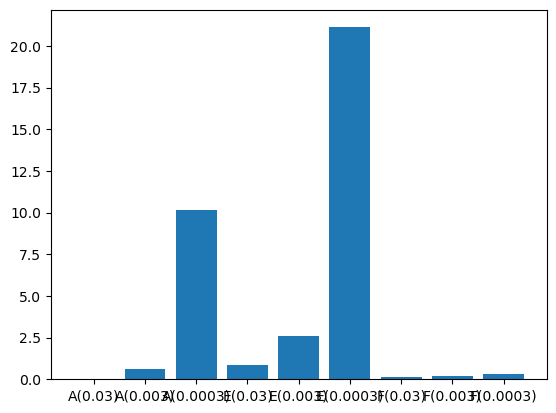

In [52]:
counts = [a_time1_1, a_time2_1, a_time3_1, e_time1_1, e_time2_1, e_time3_1, f_time1_1, f_time2_1, f_time3_1]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

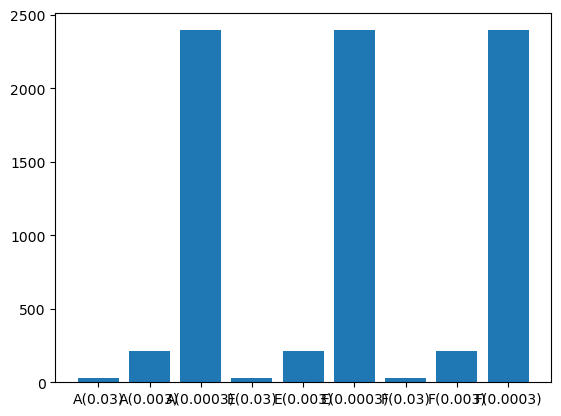

In [53]:
counts = [a_itemsetsCount1_1, a_itemsetsCount2_1, a_itemsetsCount3_1, a_itemsetsCount1_1, a_itemsetsCount2_1, a_itemsetsCount3_1, f_itemsetsCount1_1, f_itemsetsCount2_1, f_itemsetsCount3_1]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

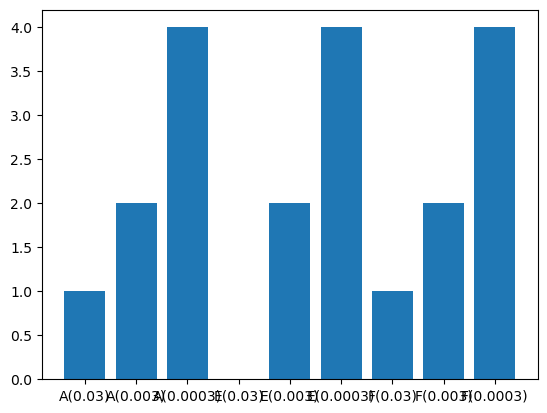

In [57]:
counts = [a_maxLen1_1, a_maxLen2_1, a_maxLen3_1, e_maxLen1_1, e_maxLen2_1, e_maxLen3_1, f_maxLen1_1, f_maxLen2_1, f_maxLen3_1]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

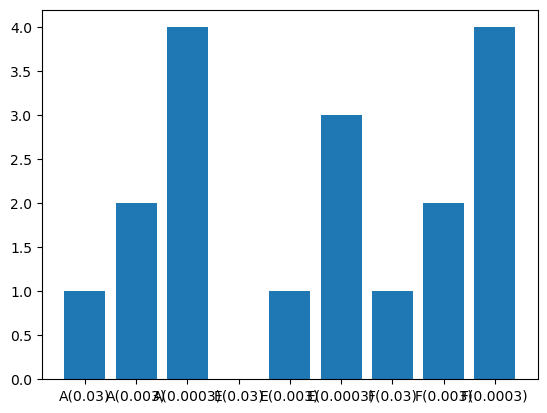

In [69]:
counts = [a_diffLenItemsetsCount1_1, a_diffLenItemsetsCount2_1, a_diffLenItemsetsCount3_1, e_diffLenItemsetsCount1_1, e_diffLenItemsetsCount2_1, e_diffLenItemsetsCount3_1, f_diffLenItemsetsCount1_1, f_diffLenItemsetsCount2_1, f_diffLenItemsetsCount3_1]
plt.bar(groups, counts)

### 2 dataset

In [70]:
groups = list(['A(' + str(sup) + ')' for sup in min_supp_2])
groups.extend(list(['E(' + str(sup) + ')' for sup in min_supp_2]))
groups.extend(list(['F(' + str(sup) + ')' for sup in min_supp_2]))

<BarContainer object of 9 artists>

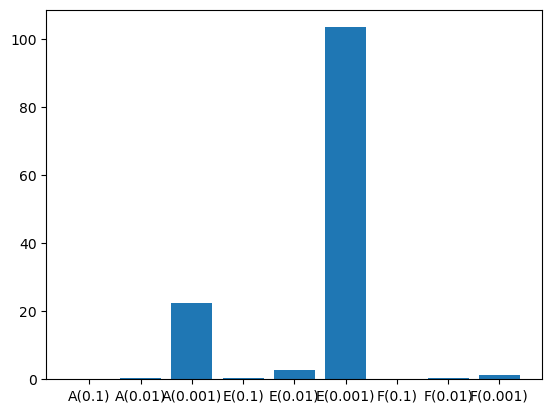

In [71]:
counts = [a_time1_2, a_time2_2, a_time3_2, e_time1_2, e_time2_2, e_time3_2, f_time1_2, f_time2_2, f_time3_2]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

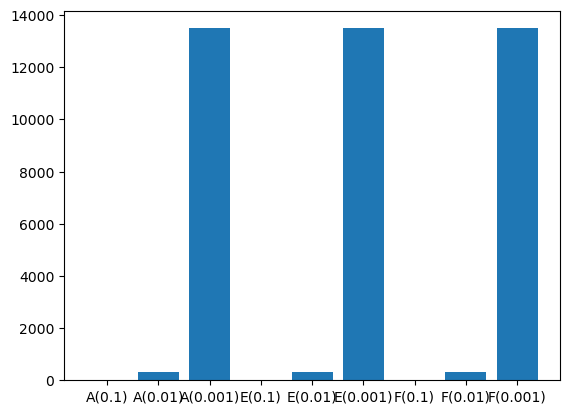

In [72]:
counts = [a_itemsetsCount1_2, a_itemsetsCount2_2, a_itemsetsCount3_2, a_itemsetsCount1_2, a_itemsetsCount2_2, a_itemsetsCount3_2, f_itemsetsCount1_2, f_itemsetsCount2_2, f_itemsetsCount3_2]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

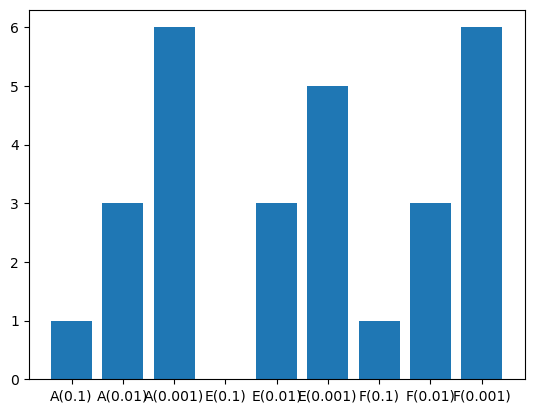

In [73]:
counts = [a_maxLen1_2, a_maxLen2_2, a_maxLen3_2, e_maxLen1_2, e_maxLen2_2, e_maxLen3_2, f_maxLen1_2, f_maxLen2_2, f_maxLen3_2]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

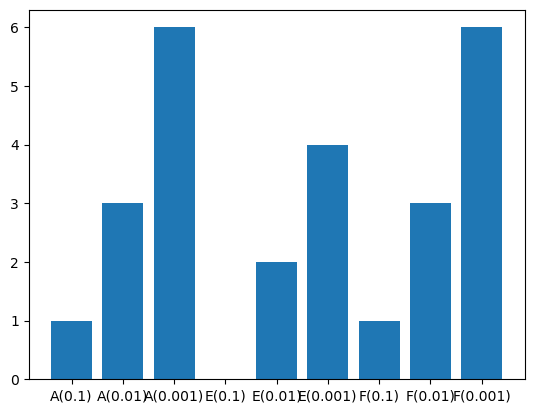

In [74]:
counts = [a_diffLenItemsetsCount1_2, a_diffLenItemsetsCount2_2, a_diffLenItemsetsCount3_2, e_diffLenItemsetsCount1_2, e_diffLenItemsetsCount2_2, e_diffLenItemsetsCount3_2, f_diffLenItemsetsCount1_2, f_diffLenItemsetsCount2_2, f_diffLenItemsetsCount3_2]
plt.bar(groups, counts)

### 3 dataset

In [75]:
groups = list(['A(' + str(sup) + ')' for sup in min_supp_3])
groups.extend(list(['E(' + str(sup) + ')' for sup in min_supp_3]))
groups.extend(list(['F(' + str(sup) + ')' for sup in min_supp_3]))

<BarContainer object of 9 artists>

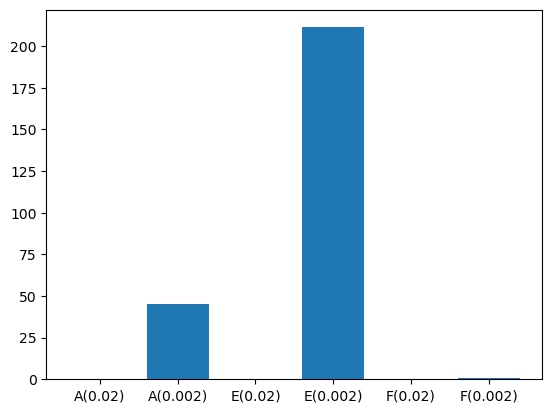

In [76]:
counts = [a_time1_3, a_time2_3, a_time3_3, e_time1_3, e_time2_3, e_time3_3, f_time1_3, f_time2_3, f_time3_3]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

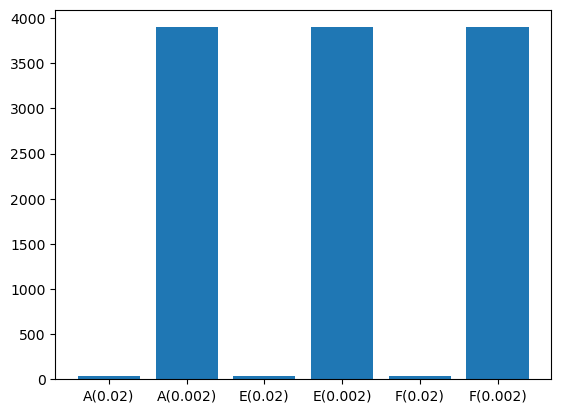

In [84]:
counts = [a_itemsetsCount1_3, a_itemsetsCount2_3, a_itemsetsCount3_3, a_itemsetsCount1_3, a_itemsetsCount2_3, a_itemsetsCount3_3, f_itemsetsCount1_3, f_itemsetsCount2_3, f_itemsetsCount3_3]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

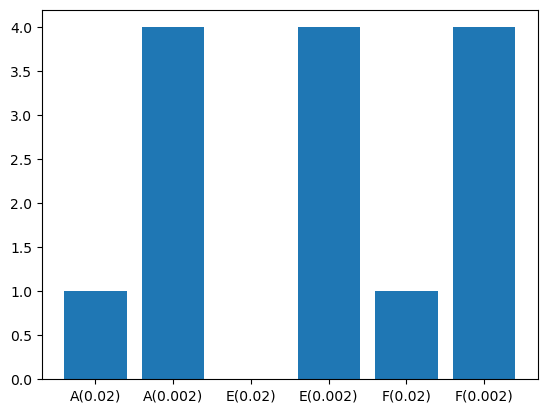

In [85]:
counts = [a_maxLen1_3, a_maxLen2_3, a_maxLen3_3, e_maxLen1_3, e_maxLen2_3, e_maxLen3_3, f_maxLen1_3, f_maxLen2_3, f_maxLen3_3]
plt.bar(groups, counts)

<BarContainer object of 9 artists>

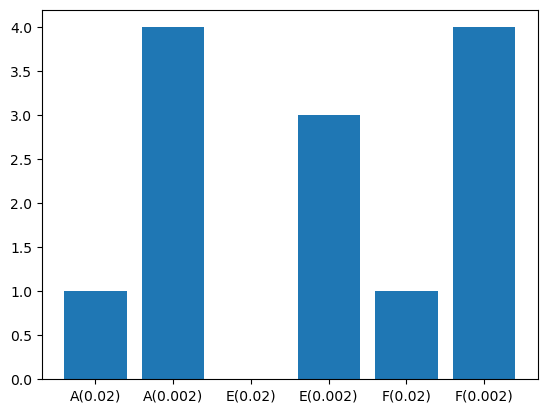

In [86]:
counts = [a_diffLenItemsetsCount1_3, a_diffLenItemsetsCount2_3, a_diffLenItemsetsCount3_3, e_diffLenItemsetsCount1_3, e_diffLenItemsetsCount2_3, e_diffLenItemsetsCount3_3, f_diffLenItemsetsCount1_3, f_diffLenItemsetsCount2_3, f_diffLenItemsetsCount3_3]
plt.bar(groups, counts)